In [1]:
#import libraries
import pandas as pd
import numpy as np
#from sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#read the dataset in the dataframe
df= pd.read_csv('autopricecleaned.csv')

In [3]:
#look at the columns
df.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'cylindersInt',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'fuel-type_diesel', 'fuel-type_gas', 'aspiration_std',
       'aspiration_turbo', 'num-of-doors_four', 'num-of-doors_two',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_front',
       'engine-location_rear', 'engine-type_dohc', 'engine-type

In [4]:
df.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,True,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,True,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,True,False,False,False,False,False,False,True,False,False


In [5]:
#show number od rows and columns
df.shape

(193, 65)

In [6]:
#see if there are null values
df.isna().sum()

symboling           0
wheel-base          0
length              0
width               0
height              0
                   ..
fuel-system_idi     0
fuel-system_mfi     0
fuel-system_mpfi    0
fuel-system_spdi    0
fuel-system_spfi    0
Length: 65, dtype: int64

In [7]:
#convert to string so all rows are seen
print(df.isna().sum().to_string())

symboling                 0
wheel-base                0
length                    0
width                     0
height                    0
curb-weight               0
engine-size               0
bore                      0
stroke                    0
compression-ratio         0
horsepower                0
peak-rpm                  0
city-mpg                  0
highway-mpg               0
price                     0
cylindersInt              0
make_alfa-romero          0
make_audi                 0
make_bmw                  0
make_chevrolet            0
make_dodge                0
make_honda                0
make_isuzu                0
make_jaguar               0
make_mazda                0
make_mercedes-benz        0
make_mercury              0
make_mitsubishi           0
make_nissan               0
make_peugot               0
make_plymouth             0
make_porsche              0
make_saab                 0
make_subaru               0
make_toyota               0
make_volkswagen     

In [8]:
has_missing_values = df.isna().any().any()
print(f"Does the dataframe contain any missing values? {has_missing_values}")

Does the dataframe contain any missing values? False


In [9]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,cylindersInt
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907,4.419689
std,1.235582,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886,1.023182
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,3.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000,4.000000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,4.000000
75%,2.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000,4.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,12.000000


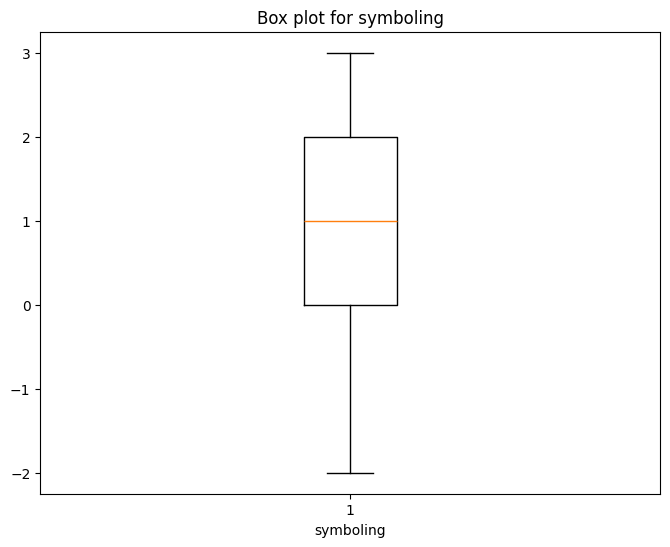

In [11]:
#Box plot plots quartiles. Q1-Q3 is IQR interquartile Range. Whiskers can be max 1.5 times IQR.
#Outliers will be indicated outside the whiskers with individual marks.
col = 'symboling'
plt.figure(figsize=(8,6))
plt.boxplot(df[col],vert= True)
plt.title(f'Box plot for {col}')
plt.xlabel(col)
plt.show()

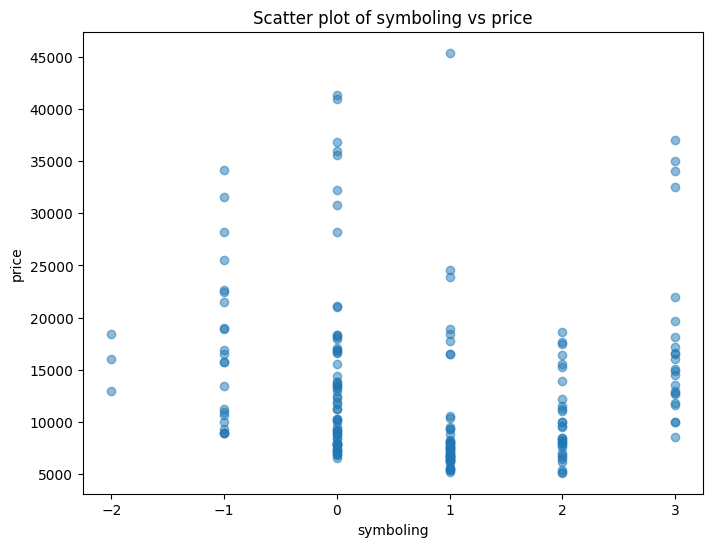

In [13]:
#Scatter plot between a feature and target column
x_column = 'symboling'
y_column = 'price'
plt.figure(figsize=(8,6))
plt.scatter(df[x_column],df[y_column], alpha=0.5)
plt.title(f'Scatter plot of {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

In [14]:
#define feature column dataset and label column dataset
y= df['price'] #price is label column
X= df.drop(columns = ['price'], inplace = False) # Feature columns are all columns except the label column.

In [15]:
#split into training and testing dataset
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size =0.3, random_state= 30)

In [16]:
#initialize  a linear regression untrained model
model = linear_model.LinearRegression()

In [17]:
#train model
model.fit(X_trainset, y_trainset)

LinearRegression()

In [18]:
# print out intercept
print("Intercept:", model.intercept_)

Intercept: 20643.706137125293


In [19]:
# print out regression coefficients. Data frame is like a table, with column headings.
coef_df = pd.DataFrame({
    'Features': X.columns,
    'Coefficients': model.coef_})

print(coef_df)

            Features  Coefficients
0          symboling   -510.695591
1         wheel-base    163.619400
2             length    -41.147616
3              width    290.533482
4             height   -190.624440
..               ...           ...
59   fuel-system_idi   3246.765672
60   fuel-system_mfi  -1475.307842
61  fuel-system_mpfi    -19.447937
62  fuel-system_spdi  -1278.697282
63  fuel-system_spfi   1795.350798

[64 rows x 2 columns]


In [20]:
# to string() forces all rows to show as opposed to be abbreviated
print(coef_df.to_string())

                  Features  Coefficients
0                symboling -5.106956e+02
1               wheel-base  1.636194e+02
2                   length -4.114762e+01
3                    width  2.905335e+02
4                   height -1.906244e+02
5              curb-weight  5.124993e+00
6              engine-size  1.861747e+02
7                     bore -1.067307e+04
8                   stroke -4.749008e+03
9        compression-ratio -7.158923e+02
10              horsepower  4.050316e+01
11                peak-rpm  1.714364e+00
12                city-mpg  7.191217e+01
13             highway-mpg  9.885628e+01
14            cylindersInt -3.365493e+03
15        make_alfa-romero -1.591616e-12
16               make_audi  2.258807e+03
17                make_bmw  8.414198e+03
18          make_chevrolet -2.834847e+03
19              make_dodge -3.144620e+03
20              make_honda  1.955220e+03
21              make_isuzu -1.023978e+03
22             make_jaguar -1.010663e+03
23              

In [21]:
#score the model using the test dataset
y_pred = model.predict(X_testset)

In [22]:
#Calculate performance metrics
# r-squared indicates the propotion of the variance  in the dependant variable that is
# predictable from  the indipendent variables in a regression model.

mae = metrics.mean_absolute_error(y_testset, y_pred)
mse = metrics. mean_squared_error(y_testset, y_pred)
rmse = mse ** 0.5
r2 = metrics.r2_score(y_testset, y_pred)

#Calculate Adjusted R-squared
n= len(y_testset) # number of observations
p= X_testset.shape[1] # number of predictions
adjusted_r2 = 1- (1-r2)* (n-1)/(n-p-1)

print(f"n is {n} and p is {p}.")

#print out the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared : {r2}")
print(f"Adjusted R-squared: {adjusted_r2}") 

n is 58 and p is 64.
Mean Absolute Error (MAE): 2154.1269333089394
Mean Squared Error (MSE): 9301431.596734405
Root Mean Squared Error (RMSE): 3049.8248468943925
R-squared : 0.7952223653070006
Adjusted R-squared: 2.6674750253572803


In [24]:
#Initialize a RandomForestRegressor untrained model
model2 = RandomForestRegressor(n_estimators = 5, random_state = 30) # students : Please choose  a different random_state number)

In [25]:
# train the model
model2.fit(X_trainset, y_trainset)

RandomForestRegressor(n_estimators=5, random_state=30)

In [26]:
#score the model using the test dataset
y_pred2 = model2.predict(X_testset)

In [27]:
#Calculate performance metrics
# r-squared indicates the propotion of the variance  in the dependant variable that is
# predictable from  the indipendent variables in a regression model.

mae2 = metrics.mean_absolute_error(y_testset, y_pred2)
mse2 = metrics. mean_squared_error(y_testset, y_pred2)
rmse2 = mse2 ** 0.5
rf_r2 = metrics.r2_score(y_testset, y_pred2)


#print out the metrics
print("performance of Random Forest Regression \n")
print(f"Mean Absolute Error (MAE): {mae2}")
print(f"Mean Squared Error (MSE): {mse2}")
print(f"Root Mean Squared Error (RMSE): {rmse2}")
print(f"R-squared : {rf_r2}") 

performance of Random Forest Regression 

Mean Absolute Error (MAE): 1891.1247126436783
Mean Squared Error (MSE): 7595095.378946362
Root Mean Squared Error (RMSE): 2755.9200603330937
R-squared : 0.832788571222261


In [28]:
print("performance of Linear Regression \n")
print(f"Mean Absolute Error (MAE) : {mae}")
print(f"Mean Squared Error (MSE) : {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared : {r2}")

performance of Linear Regression 

Mean Absolute Error (MAE) : 2154.1269333089394
Mean Squared Error (MSE) : 9301431.596734405
Root Mean Squared Error (RMSE): 3049.8248468943925
R-squared : 0.7952223653070006
